In [1]:
# importing Packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [2]:
# loading the data
data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
# glimpse of data
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
# check the shape of the data
data.shape

(414, 9)

In [5]:
# checking null values in the data
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
# getting information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
# description of the data
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
# converting datatype of 'House size (sqft)' into float
data['House size (sqft)'] = data['House size (sqft)'].astype(float)

In [9]:
# creating new column named 'House_Price($)' which is the independent variable
data['House_Price($)'] = data['House size (sqft)']*data['House price of unit area']

In [10]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House_Price($)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575.0,37.9,21792.5
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240.0,42.2,52328.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060.0,47.3,50138.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875.0,54.8,47950.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491.0,43.1,21162.1


In [11]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House_Price($)
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193,35597.804106
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488,19890.892075
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,5440.400000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000,20482.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000,31224.200000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000,48439.375000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000,161327.500000


In [12]:
data['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

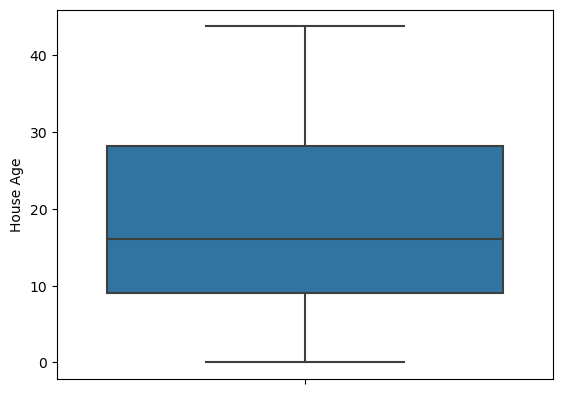

In [13]:
# boxplot for outliers visualization
sns.boxplot(y = 'House Age' , data = data )
plt.show()

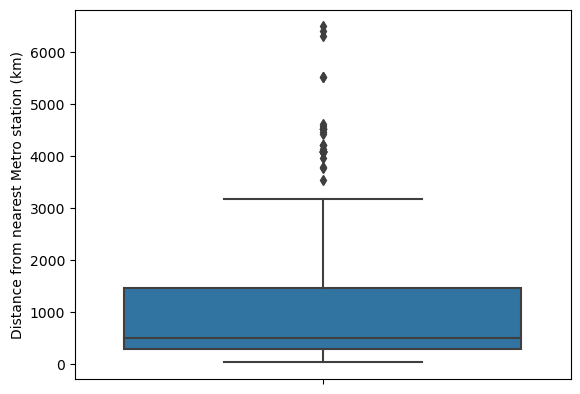

In [14]:
sns.boxplot(y = 'Distance from nearest Metro station (km)' , data = data )
plt.show()

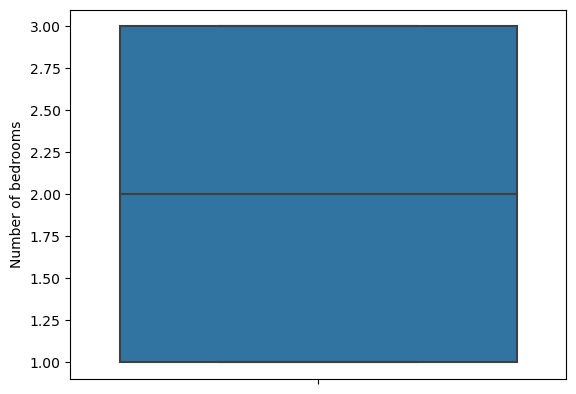

In [15]:
sns.boxplot(y = 'Number of bedrooms' , data = data )
plt.show()

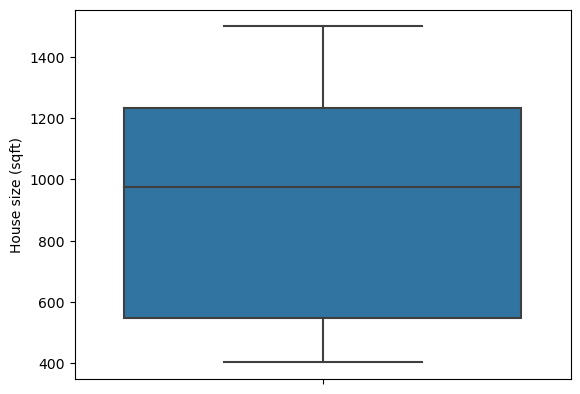

In [16]:
sns.boxplot(y = 'House size (sqft)' , data = data )
plt.show()

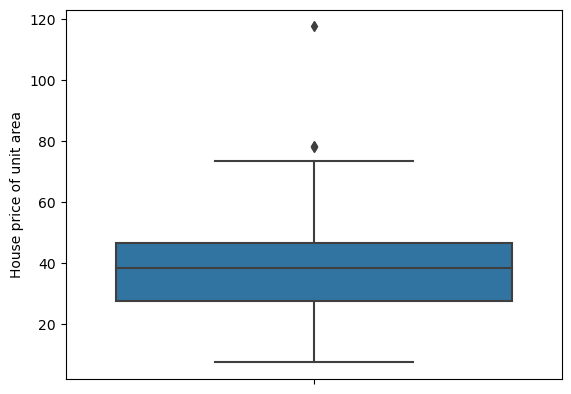

In [17]:
sns.boxplot(y = 'House price of unit area' , data = data )
plt.show()

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


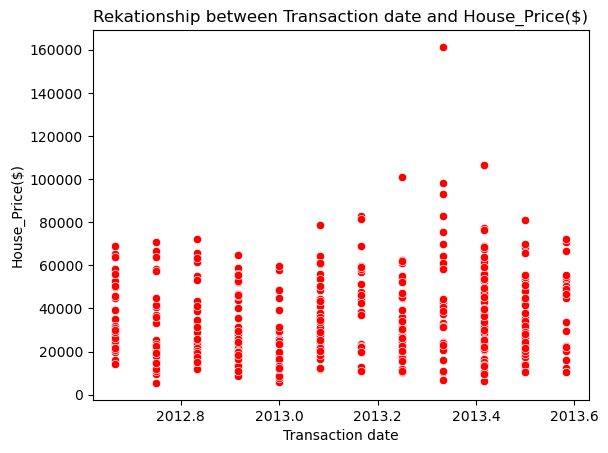

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


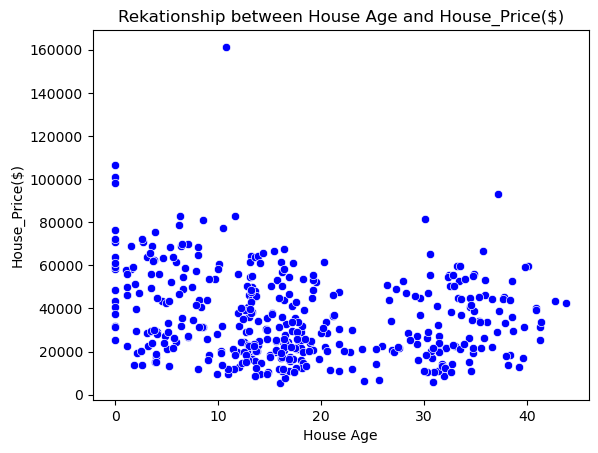

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


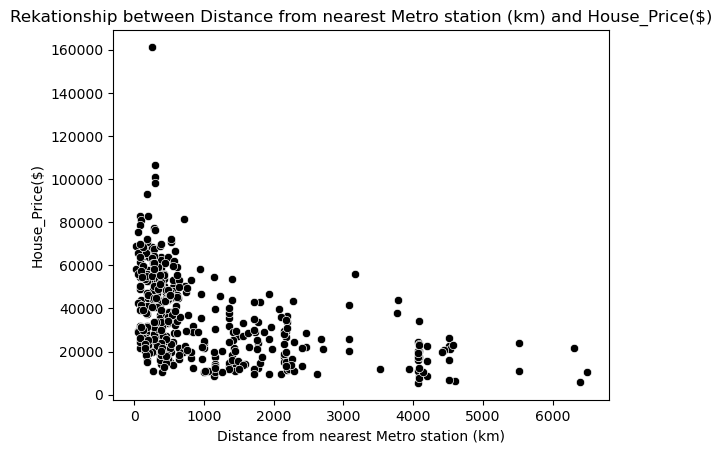

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


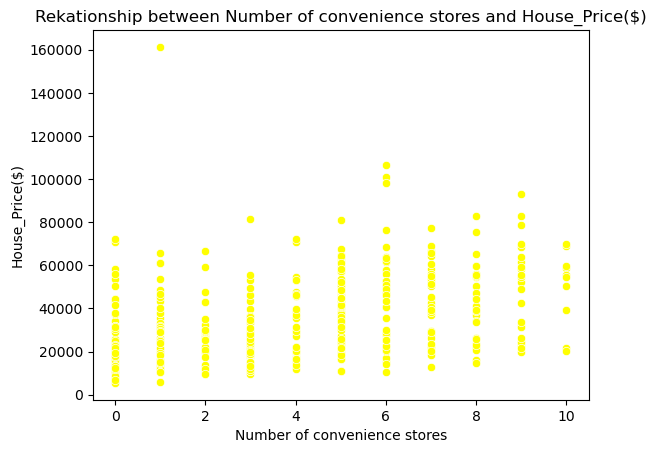

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


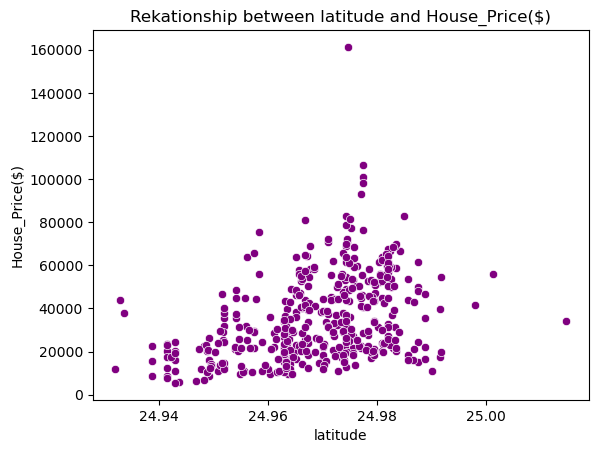

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


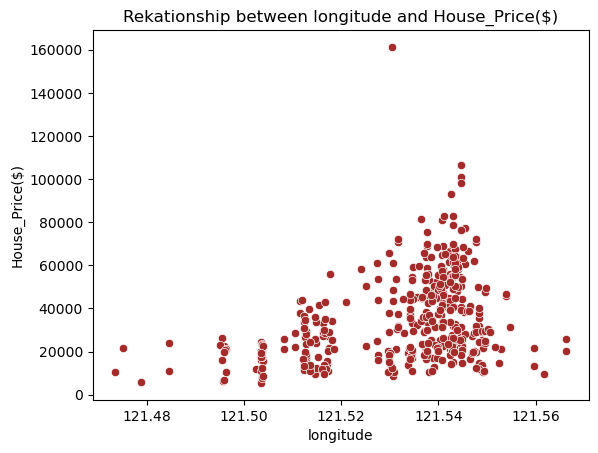

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


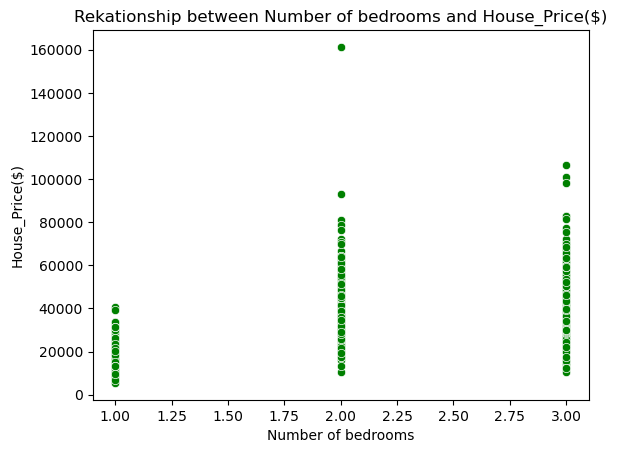

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


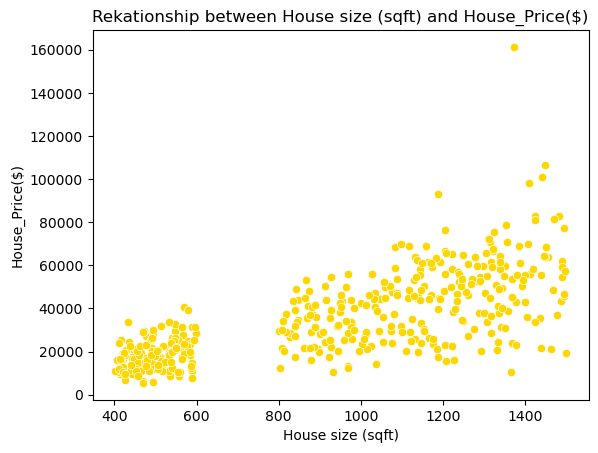

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


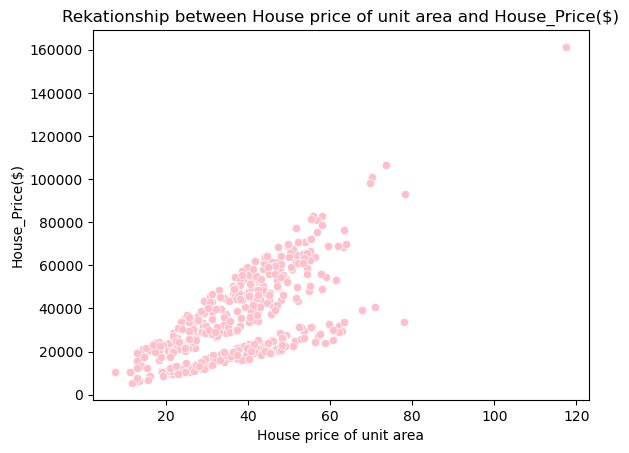

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


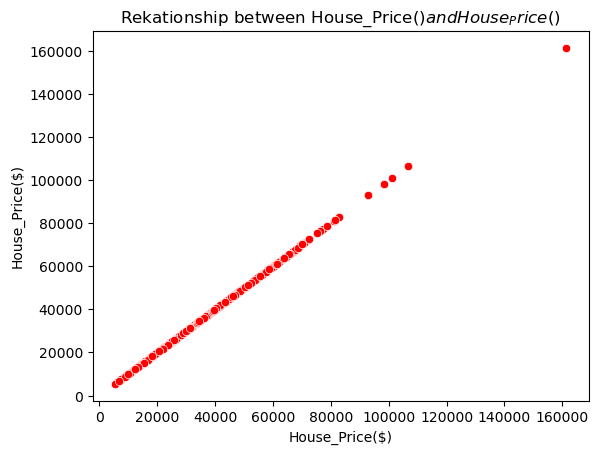

In [18]:
# Scatter plot

def scatter_plot(y):
    scatter_plot = data.drop(y, axis = 1)
    i = data.columns
    
    plot1 = sns.scatterplot(i[0], y, data = data, color = 'red')
    plt.title('Rekationship between {} and House_Price($)'.format(i[0]))
    plt.xlabel('{}'.format(i[0]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot2 = sns.scatterplot(i[1], y, data = data, color = 'blue')
    plt.title('Rekationship between {} and House_Price($)'.format(i[1]))
    plt.xlabel('{}'.format(i[1]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot3 = sns.scatterplot(i[2], y, data = data, color = 'black')
    plt.title('Rekationship between {} and House_Price($)'.format(i[2]))
    plt.xlabel('{}'.format(i[2]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot4 = sns.scatterplot(i[3], y, data = data, color = 'yellow')
    plt.title('Rekationship between {} and House_Price($)'.format(i[3]))
    plt.xlabel('{}'.format(i[3]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot5 = sns.scatterplot(i[4], y, data = data, color = 'purple')
    plt.title('Rekationship between {} and House_Price($)'.format(i[4]))
    plt.xlabel('{}'.format(i[4]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot6 = sns.scatterplot(i[5], y, data = data, color = 'brown')
    plt.title('Rekationship between {} and House_Price($)'.format(i[5]))
    plt.xlabel('{}'.format(i[5]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot7 = sns.scatterplot(i[6], y, data = data, color = 'green')
    plt.title('Rekationship between {} and House_Price($)'.format(i[6]))
    plt.xlabel('{}'.format(i[6]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot8 = sns.scatterplot(i[7], y, data = data, color = 'gold')
    plt.title('Rekationship between {} and House_Price($)'.format(i[7]))
    plt.xlabel('{}'.format(i[7]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot9 = sns.scatterplot(i[8], y, data = data, color = 'pink')
    plt.title('Rekationship between {} and House_Price($)'.format(i[8]))
    plt.xlabel('{}'.format(i[8]))
    plt.ylabel('House_Price($)')
    plt.show()
    
    plot10 = sns.scatterplot(i[9], y, data = data, color = 'red')
    plt.title('Rekationship between {} and House_Price($)'.format(i[9]))
    plt.xlabel('{}'.format(i[9]))
    plt.ylabel('House_Price($)')
    plt.show()
    
scatter_plot('House_Price($)')

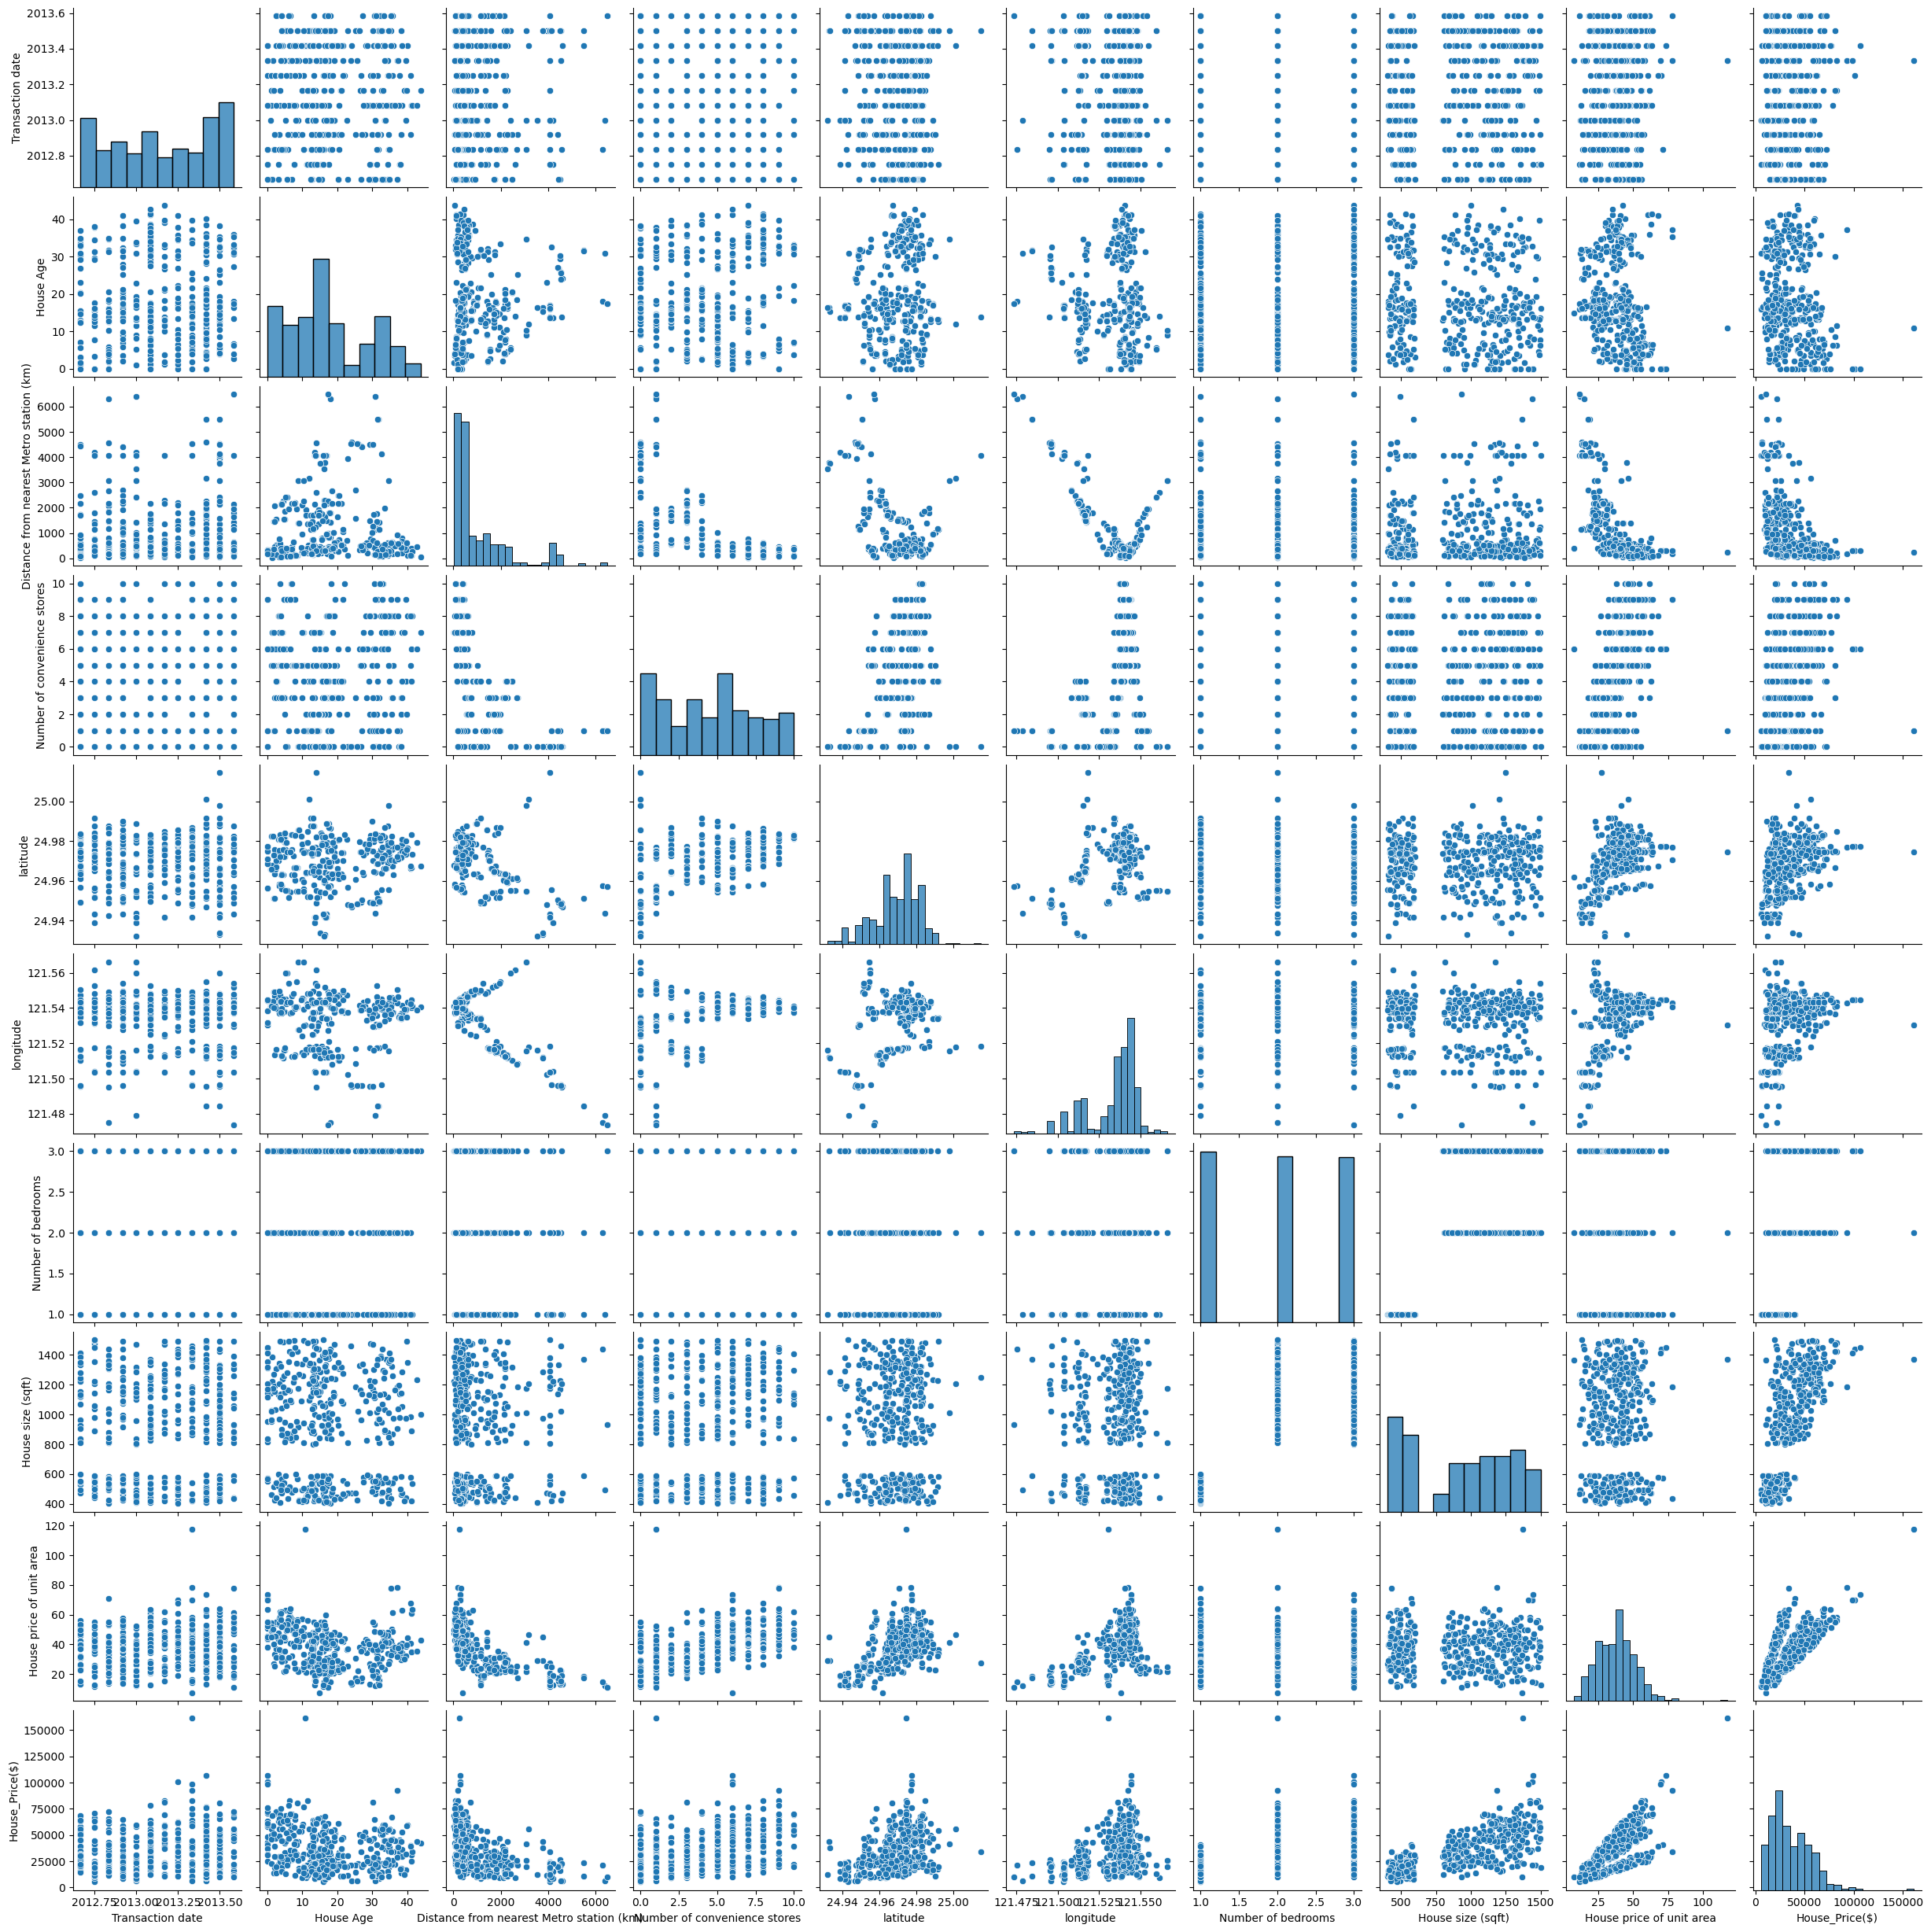

In [19]:
sns.pairplot(data  , vars = data.columns )

C:\Users\Ruchi Kumari\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House_Price($)', ylabel='Density'>

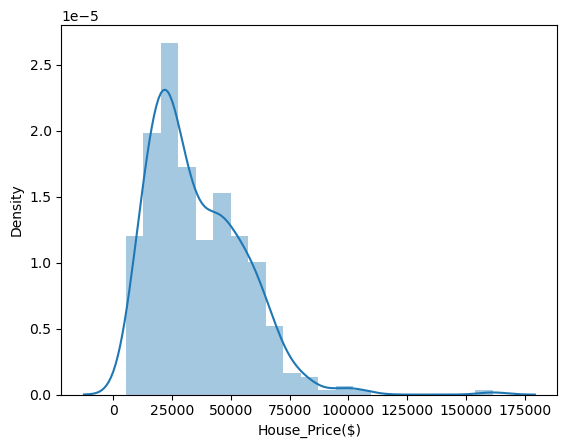

In [20]:
sns.distplot(data['House_Price($)'])

<AxesSubplot:>

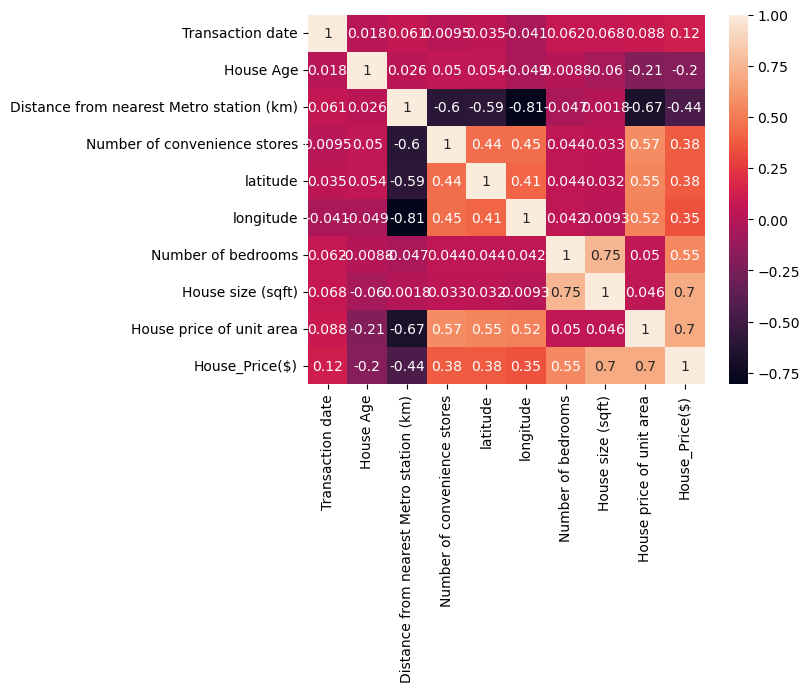

In [21]:
# to check multicollinearity
sns.heatmap(data.corr() , annot = True) # there is no multicollinearity

In [22]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'House_Price($)'],
      dtype='object')

In [23]:
# Spliting the data into independent variable and dependent variable
x = data[['House Age','Distance from nearest Metro station (km)','Number of convenience stores', 'latitude', 
         'longitude', 'House size (sqft)', 'House price of unit area']]
y = data['House_Price($)']

In [24]:
x.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,575.0,37.9
1,19.5,306.59470,9,24.98034,121.53951,1240.0,42.2
2,13.3,561.98450,5,24.98746,121.54391,1060.0,47.3
3,13.3,561.98450,5,24.98746,121.54391,875.0,54.8
4,5.0,390.56840,5,24.97937,121.54245,491.0,43.1


In [25]:
# train test split

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.75 , random_state = 101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(310, 7)
(104, 7)
(310,)
(104,)


In [26]:
# MODELING

from sklearn.linear_model import Ridge # Ridge algorithm
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)

In [27]:
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_predict)))
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_predict)))

R-Squared of Ridge model is 0.9565896165188698
Explained Variance Score of Ridge model is 0.9577129180894974


In [28]:
from sklearn.linear_model import Lasso # Lasso algorithm
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
lasso_predict = lasso.predict(x_test)

In [29]:
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_predict)))
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_predict)))

Explained Variance Score of Lasso model is 0.9577421954198331
R-Squared of Lasso model is 0.9565642087859767


In [30]:
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
bayesian_predict = bayesian.predict(x_test)

In [31]:
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_predict)))
print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_predict)))

Explained Variance Score of Bayesian model is 0.9579267348660925
R-Squared of Bayesian model is 0.9568525945323029


In [32]:
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
en_predict = en.predict(x_test)

In [33]:
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_predict)))
print('R-Squared of ElasticNet is {}'.format(r2(y_test, en_predict)))

Explained Variance Score of ElasticNet is 0.9577151925342777
R-Squared of ElasticNet is 0.9565938802051415


In [34]:
from sklearn.linear_model import LinearRegression  # Linear_Regression_Model
lm = LinearRegression()
lm.fit(x_train , y_train)
lr_predict = lm.predict(x_test)

In [35]:
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, lr_predict)))
print('R-Squared of ElasticNet is {}'.format(r2(y_test, lr_predict)))

Explained Variance Score of ElasticNet is 0.9577453318818671
R-Squared of ElasticNet is 0.956566185024574


In [36]:
from sklearn.ensemble import RandomForestRegressor  
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(x_train , y_train)
rf_predict = rf.predict(x_test)


In [37]:
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, rf_predict)))
print('R-Squared of ElasticNet is {}'.format(r2(y_test, rf_predict)))

Explained Variance Score of ElasticNet is 0.9913165528780996
R-Squared of ElasticNet is 0.9912643202927539


In [38]:
# HENCE RANDOM FOREST GIVES MAXIMUM ACCURACY